In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

#Add random seed so we get reproducible results.
seed = 7
np.random.seed(seed)

In [3]:
train_df.head(n=10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
print(train_df.count())
print(test_df.count())

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64
PassengerId    418
Pclass         418
Name           418
Sex            418
Age            332
SibSp          418
Parch          418
Ticket         418
Fare           417
Cabin           91
Embarked       418
dtype: int64


The cabin column is missing a lot of values, thus we will remove it from our dataframe.
Name, Ticket and passengerid seem irrelevant for survival therefore these will also be dropped.

In [6]:
train_df = train_df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis = 1)
test_df = test_df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis = 1)

In [7]:
train_df.head(n= 5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


We can skip filling missing(sparse) data here since xgboost supports sparse data, therefore we continue by encoding the categorical features.

In [44]:
train_df = pd.get_dummies(train_df, columns = ["Sex", "Pclass","Embarked"])
test_df = pd.get_dummies(test_df, columns = ["Sex", "Pclass","Embarked"])

ValueError: labels ['Sex' 'Pclass' 'Embarked'] not contained in axis

In [9]:
train_df.head(n = 6)

,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,1,0,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0,1,0,0
2,1,26.0,0,0,7.9250,1,0,0,0,1,0,0,1
3,1,35.0,1,0,53.1000,1,0,1,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,1,0,0,1,0,0,1
5,0,NaN,0,0,8.4583,0,1,0,0,1,0,1,0


In [10]:
test_df.head(n=6)

,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,34.5,0,0,7.8292,0,1,0,0,1,0,1,0
1,47.0,1,0,7.0000,1,0,0,0,1,0,0,1
2,62.0,0,0,9.6875,0,1,0,1,0,0,1,0
3,27.0,0,0,8.6625,0,1,0,0,1,0,0,1
4,22.0,1,1,12.2875,1,0,0,0,1,0,0,1
5,14.0,0,0,9.2250,0,1,0,0,1,0,0,1


Now, it is said that regularly feature scaling is not needed for XGBoost, so we can start applying the model after we split our data into training and validation data.
Lets evaluate and see what our current data gives us. We can optimize and tweak based upon the results

In [2]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
train, validate = train_test_split(train_df, test_size = 0.25, random_state = seed)

dtrain = xgb.DMatrix(train.iloc[:,1:], train.iloc[:, 0])
dval = xgb.DMatrix(validate.iloc[:,1:], validate.iloc[:, 0])
dtest = xgb.DMatrix(test_df)

ValueError: DataFrame.dtypes for data must be int, float or bool.
Did not expect the data types in fields Name, Sex, Ticket, Cabin, Embarked

We start by seeing what result the default parameters return.

In [12]:
# specify parameters via map
param = {'max_depth':2, 'eta':0.3, 'silent':1, 'objective':'binary:logistic' }
param['nthread'] = 4
param['eval_metric'] = 'auc'
num_round = 50
evallist = [(dval, 'eval'), (dtrain, 'train')]
#Train
booster = xgb.train(param, dtrain, num_round, evallist)

[0]	eval-auc:0.857999	train-auc:0.820264
[1]	eval-auc:0.876884	train-auc:0.83815
[2]	eval-auc:0.87727	train-auc:0.837261
[3]	eval-auc:0.880524	train-auc:0.840187
[4]	eval-auc:0.880267	train-auc:0.840783
[5]	eval-auc:0.890373	train-auc:0.858409
[6]	eval-auc:0.897482	train-auc:0.860772
[7]	eval-auc:0.897696	train-auc:0.865967
[8]	eval-auc:0.901978	train-auc:0.872344
[9]	eval-auc:0.900266	train-auc:0.874362
[10]	eval-auc:0.901465	train-auc:0.878947
[11]	eval-auc:0.901165	train-auc:0.881892
[12]	eval-auc:0.903563	train-auc:0.883711
[13]	eval-auc:0.901293	train-auc:0.884959
[14]	eval-auc:0.89958	train-auc:0.884945
[15]	eval-auc:0.900394	train-auc:0.886311
[16]	eval-auc:0.900865	train-auc:0.8885
[17]	eval-auc:0.903991	train-auc:0.888741
[18]	eval-auc:0.906132	train-auc:0.89117
[19]	eval-auc:0.905062	train-auc:0.891322
[20]	eval-auc:0.904462	train-auc:0.892399
[21]	eval-auc:0.903263	train-auc:0.891969
[22]	eval-auc:0.902921	train-auc:0.89351
[23]	eval-auc:0.902749	train-auc:0.894144
[24]	eval

Seems like we get a score of 86.6auc on the evaluation set
Lets now use cross-validation to find the optimal number of rounds, eta combination and check the validity.

In [13]:
#Find optimal NR of training rounds and validate with cross-validation.

param = {'max_depth':2, 'eta':0.3, 'silent':1, 'objective':'binary:logistic'}
param['nthread'] = 4

xgb.cv(param, dtrain, num_boost_round = 10001, nfold= 3, early_stopping_rounds = 50,
       metrics={'auc'})

,test-auc-mean,test-auc-std,train-auc-mean,train-auc-std
0,0.803267,0.022545,0.815888,0.018126
1,0.828136,0.032149,0.838544,0.011940
2,0.828870,0.032722,0.841683,0.011380
3,0.832178,0.029442,0.844389,0.012464
4,0.834282,0.029709,0.848364,0.007503
5,0.835272,0.028863,0.857108,0.006157
6,0.839747,0.031662,0.864674,0.003272
7,0.841715,0.029827,0.870529,0.005099
8,0.847256,0.030420,0.876078,0.006103
9,0.851738,0.031697,0.880778,0.006350


In [14]:
#Adjust eta
param = {'max_depth':2, 'eta':0.1, 'silent':1, 'objective':'binary:logistic'}
param['nthread'] = 4

print('running cross validation')
# do cross validation, this will print result out as
# [iteration]  metric_name:mean_value+std_value
# std_value is standard deviation of the metric
xgb.cv(param, dtrain, num_boost_round = 1000, nfold= 3, early_stopping_rounds = 50,
       metrics={'auc'})

running cross validation


,test-auc-mean,test-auc-std,train-auc-mean,train-auc-std
0,0.803267,0.022545,0.815888,0.018126
1,0.827647,0.032278,0.837205,0.010188
2,0.828773,0.032999,0.839697,0.010732
3,0.827647,0.032278,0.837205,0.010188
4,0.829562,0.032507,0.841970,0.011680
5,0.829562,0.032507,0.841970,0.011680
6,0.829135,0.032761,0.842581,0.011870
7,0.831879,0.029997,0.843754,0.012422
8,0.831879,0.029997,0.843754,0.012422
9,0.831573,0.030294,0.843664,0.012373


When comparing the normal validation with the cross-validation it seems safe to say that we currently have an accuracy of about 86.7auc with an optimum training ETA of 0.3 at 45 rounds.

In [15]:
param = {'max_depth':2, 'eta':0.3, 'silent':1, 'objective':'binary:logistic', 'seed':5 }
param['nthread'] = 4
param['eval_metric'] = 'auc'
num_round = 45
evallist = [(dval, 'eval'), (dtrain, 'train')]
#Train
booster = xgb.train(param, dtrain, num_round, evallist)

[0]	eval-auc:0.857999	train-auc:0.820264
[1]	eval-auc:0.876884	train-auc:0.83815
[2]	eval-auc:0.87727	train-auc:0.837261
[3]	eval-auc:0.880524	train-auc:0.840187
[4]	eval-auc:0.880267	train-auc:0.840783
[5]	eval-auc:0.890373	train-auc:0.858409
[6]	eval-auc:0.897482	train-auc:0.860772
[7]	eval-auc:0.897696	train-auc:0.865967
[8]	eval-auc:0.901978	train-auc:0.872344
[9]	eval-auc:0.900266	train-auc:0.874362
[10]	eval-auc:0.901465	train-auc:0.878947
[11]	eval-auc:0.901165	train-auc:0.881892
[12]	eval-auc:0.903563	train-auc:0.883711
[13]	eval-auc:0.901293	train-auc:0.884959
[14]	eval-auc:0.89958	train-auc:0.884945
[15]	eval-auc:0.900394	train-auc:0.886311
[16]	eval-auc:0.900865	train-auc:0.8885
[17]	eval-auc:0.903991	train-auc:0.888741
[18]	eval-auc:0.906132	train-auc:0.89117
[19]	eval-auc:0.905062	train-auc:0.891322
[20]	eval-auc:0.904462	train-auc:0.892399
[21]	eval-auc:0.903263	train-auc:0.891969
[22]	eval-auc:0.902921	train-auc:0.89351
[23]	eval-auc:0.902749	train-auc:0.894144
[24]	eval

Lets plot the feature importance with the currently optimum model.

Very well, lets take a look at some of the results and statistics.

Text(0,0.5,'Feature Importance Score')

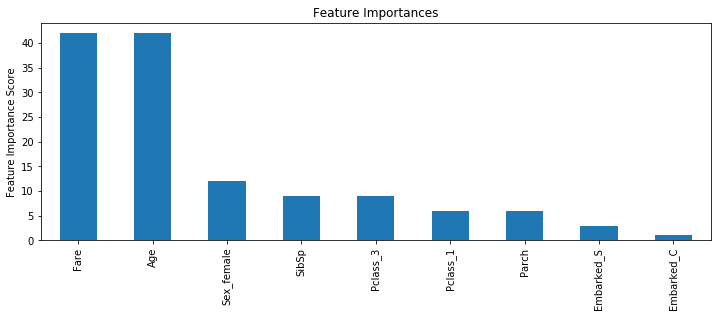

In [16]:
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

feat_imp = pd.Series(booster.get_fscore()).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

In [17]:
y_pred = booster.predict(data=dval)
for i in range(len(y_pred)):
    if y_pred[i] > 0.5:
        y_pred[i] = 1
    else:
        y_pred[i] = 0
y_pred

array([ 0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
        0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,
        0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,
        0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,
        0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
        1.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,
        0.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,
        1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,
        0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,
        0.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,  0.,
        0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,
        0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,
        0.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,
        0.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  1

In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(dval.get_label(), y_pred)
cm

array([[127,  12],
       [ 22,  62]])

In [19]:
(7+26)/(135+55)

0.1736842105263158

It seems we get 82% accuracy on our test set with the current model.
Now unfortunately XGBoost does not support grid search unless if using the sklearn edition, hence we will train a model with sklearn xgboost.

In [20]:
x_sktrain = train.iloc[:,1:]
y_sktrain = train.iloc[:, 0]
x_skval = validate.iloc[:,1:]
y_skval = validate.iloc[:, 0]
Eval_set= [(x_skval, y_skval), (x_sktrain, y_sktrain)]

clf = xgb.XGBClassifier(n_estimators=45,
                       max_depth = 2,
                       learning_rate=0.3,
                       silent=False,
                       objective='binary:logistic',
                       booster='gbtree',
                        seed = 5)
clf.fit(x_sktrain, y_sktrain, eval_set= Eval_set, eval_metric = 'auc')
pred = clf.predict(x_skval)

[0]	validation_0-auc:0.857999	validation_1-auc:0.820264
[1]	validation_0-auc:0.876884	validation_1-auc:0.83815
[2]	validation_0-auc:0.87727	validation_1-auc:0.837261
[3]	validation_0-auc:0.880524	validation_1-auc:0.840187
[4]	validation_0-auc:0.880267	validation_1-auc:0.840783
[5]	validation_0-auc:0.890373	validation_1-auc:0.858409
[6]	validation_0-auc:0.897482	validation_1-auc:0.860772
[7]	validation_0-auc:0.897696	validation_1-auc:0.865967
[8]	validation_0-auc:0.901978	validation_1-auc:0.872344
[9]	validation_0-auc:0.900266	validation_1-auc:0.874362
[10]	validation_0-auc:0.901465	validation_1-auc:0.878947
[11]	validation_0-auc:0.901165	validation_1-auc:0.881892
[12]	validation_0-auc:0.903563	validation_1-auc:0.883711
[13]	validation_0-auc:0.901293	validation_1-auc:0.884959
[14]	validation_0-auc:0.89958	validation_1-auc:0.884945
[15]	validation_0-auc:0.900394	validation_1-auc:0.886311
[16]	validation_0-auc:0.900865	validation_1-auc:0.8885
[17]	validation_0-auc:0.903991	validation_1-au

In [21]:
confusion_matrix(pred, y_skval)


array([[127,  22],
       [ 12,  62]])

In [22]:
(26+7)/(135+55)

0.1736842105263158

Lets start by tuning the max depth and min child weight'
Most parameters are tuned based upon info and examples given by: 
https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

In [23]:
parameters_test1 = {'max_depth':range(3,10,2),
'min_child_weight':range(1,6,2)}
 
from sklearn.model_selection import GridSearchCV

grsearch1 = GridSearchCV(xgb.XGBClassifier(n_estimators=45,
                       max_depth = 2,
                       learning_rate=0.3,
                       silent=False,
                       objective='binary:logistic',
                       booster='gbtree'),
                       param_grid = parameters_test1, scoring ='roc_auc', n_jobs =4, iid=False, cv=3, return_train_score = True)
grsearch1.fit(x_sktrain, y_sktrain)

pd.DataFrame(grsearch1.cv_results_)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,param_min_child_weight,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.051706,0.006149,0.841734,0.960488,3,1,"{'max_depth': 3, 'min_child_weight': 1}",5,0.856476,0.955565,0.855500,0.954702,0.813227,0.971195,0.013048,0.002517,0.020162,0.007580
1,0.053189,0.005527,0.840152,0.947384,3,3,"{'max_depth': 3, 'min_child_weight': 3}",6,0.839883,0.944256,0.866661,0.939135,0.813911,0.958761,0.014136,0.003019,0.021536,0.008312
2,0.033190,0.005324,0.851846,0.937355,3,5,"{'max_depth': 3, 'min_child_weight': 5}",1,0.859022,0.935908,0.878331,0.927688,0.818186,0.948470,0.001215,0.002504,0.025073,0.008546
3,0.035586,0.003480,0.824248,0.990995,5,1,"{'max_depth': 5, 'min_child_weight': 1}",10,0.836403,0.990630,0.841326,0.988351,0.795015,0.994006,0.001084,0.000096,0.020768,0.002323
4,0.035883,0.002894,0.836495,0.973505,5,3,"{'max_depth': 5, 'min_child_weight': 3}",9,0.841623,0.974721,0.868486,0.966948,0.799376,0.978845,0.001401,0.000126,0.028446,0.004933
5,0.044426,0.003101,0.844250,0.956078,5,5,"{'max_depth': 5, 'min_child_weight': 5}",3,0.848710,0.957481,0.877440,0.947568,0.806601,0.963185,0.015170,0.000467,0.029092,0.006453
6,0.052102,0.003237,0.822968,0.995400,7,1,"{'max_depth': 7, 'min_child_weight': 1}",11,0.840180,0.995453,0.836658,0.993334,0.792066,0.997411,0.017180,0.000282,0.021898,0.001665
7,0.042250,0.003672,0.839145,0.978148,7,3,"{'max_depth': 7, 'min_child_weight': 3}",7,0.841623,0.979822,0.868486,0.973156,0.807327,0.981465,0.002018,0.000958,0.025029,0.003593
8,0.036702,0.002675,0.843516,0.960038,7,5,"{'max_depth': 7, 'min_child_weight': 5}",4,0.854821,0.962497,0.874512,0.953243,0.801214,0.964374,0.001515,0.000329,0.030973,0.004865
9,0.051137,0.003188,0.818055,0.996879,9,1,"{'max_depth': 9, 'min_child_weight': 1}",12,0.829019,0.996774,0.846588,0.995837,0.778557,0.998027,0.000718,0.000431,0.028835,0.000897


In [24]:
grsearch1.best_params_, grsearch1.best_score_

({'max_depth': 3, 'min_child_weight': 5}, 0.85184643157891227)

Well this doesn't seem like an improvement really, however the result is cross-validated and contains the previously used parameters. Therefore we will continue these in the training to see the end-result. lets assume the best parameters to be 3 and 1 for depth and child weight.

In [25]:
parameters_test2 = { 
'gamma':[i/10.0 for i in range(0,5)]}

grsearch2 = GridSearchCV(xgb.XGBClassifier(n_estimators=45,
                       max_depth = 3,
                       min_child_weight = 1,
                       learning_rate=0.3,
                       silent=False,
                       objective='binary:logistic',
                       booster='gbtree'),
                       param_grid = parameters_test2, scoring ='roc_auc', n_jobs =4, iid=False, cv=3, return_train_score = True)
grsearch2.fit(x_sktrain, y_sktrain)

pd.DataFrame(grsearch2.cv_results_)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_gamma,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.061369,0.006951,0.841734,0.960488,0,{'gamma': 0.0},4,0.856476,0.955565,0.855500,0.954702,0.813227,0.971195,0.018658,0.002826,0.020162,0.007580
1,0.051784,0.003496,0.843078,0.959213,0.1,{'gamma': 0.1},3,0.860635,0.954244,0.855500,0.954702,0.813098,0.968692,0.019508,0.001254,0.021302,0.006705
2,0.030092,0.003696,0.843908,0.960896,0.2,{'gamma': 0.2},1,0.855500,0.959781,0.853420,0.954937,0.822803,0.967970,0.002257,0.000650,0.014948,0.005379
3,0.022849,0.001868,0.843748,0.959367,0.3,{'gamma': 0.3},2,0.852826,0.957290,0.857113,0.953563,0.821306,0.967249,0.003391,0.000167,0.015965,0.005777
4,0.021280,0.002496,0.838639,0.960540,0.4,{'gamma': 0.4},5,0.837421,0.958355,0.858301,0.954660,0.820195,0.968607,0.004517,0.000509,0.015580,0.005900


In [26]:
grsearch2.best_params_, grsearch2.best_score_

({'gamma': 0.2}, 0.84390768486990797)

Tune subsample and colsample_bytree


In [27]:
parameters_test3 = { 
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
 }

grsearch3 = GridSearchCV(xgb.XGBClassifier(n_estimators=45,
                       max_depth = 3,
                       min_child_weight = 1,
                       learning_rate=0.3,
                       gamma = 0,
                       silent=False,
                       objective='binary:logistic',
                       booster='gbtree'),
                       param_grid = parameters_test3, scoring ='roc_auc', n_jobs =4, iid=False, cv=3, return_train_score = True)
grsearch3.fit(x_sktrain, y_sktrain)
pd.DataFrame(grsearch3.cv_results_)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_colsample_bytree,param_subsample,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.054423,0.008068,0.845801,0.947401,0.6,0.6,"{'colsample_bytree': 0.6, 'subsample': 0.6}",9,0.852487,0.945204,0.863011,0.937527,0.821905,0.959472,0.022361,0.006305,0.017435,0.009093
1,0.024057,0.003291,0.840781,0.946968,0.6,0.7,"{'colsample_bytree': 0.6, 'subsample': 0.7}",14,0.854227,0.945492,0.851299,0.938890,0.816818,0.956523,0.006752,0.000728,0.016987,0.007274
2,0.022564,0.002854,0.847959,0.949060,0.6,0.8,"{'colsample_bytree': 0.6, 'subsample': 0.8}",5,0.854099,0.945843,0.876252,0.940029,0.813526,0.961308,0.005318,0.000792,0.025973,0.008980
3,0.016754,0.002424,0.845067,0.954006,0.6,0.9,"{'colsample_bytree': 0.6, 'subsample': 0.9}",12,0.850068,0.953350,0.868231,0.946067,0.816903,0.962602,0.000271,0.000284,0.021251,0.006766
4,0.018573,0.002387,0.831142,0.949962,0.7,0.6,"{'colsample_bytree': 0.7, 'subsample': 0.6}",16,0.838058,0.945215,0.852614,0.943511,0.802753,0.961159,0.000379,0.000332,0.020935,0.007948
5,0.022205,0.002741,0.845160,0.949076,0.7,0.7,"{'colsample_bytree': 0.7, 'subsample': 0.7}",11,0.859829,0.946759,0.855755,0.940423,0.819896,0.960045,0.004633,0.000581,0.017942,0.008176
6,0.024886,0.003418,0.844746,0.954430,0.7,0.8,"{'colsample_bytree': 0.7, 'subsample': 0.8}",13,0.858895,0.951998,0.862672,0.947036,0.812671,0.964257,0.000953,0.000273,0.022733,0.007238
7,0.025220,0.003552,0.847267,0.954781,0.7,0.9,"{'colsample_bytree': 0.7, 'subsample': 0.9}",6,0.862120,0.955831,0.865770,0.943767,0.813911,0.964745,0.002285,0.000386,0.023633,0.008597
8,0.033982,0.003809,0.837989,0.949989,0.8,0.6,"{'colsample_bytree': 0.8, 'subsample': 0.6}",15,0.851086,0.945832,0.860041,0.941956,0.802839,0.962177,0.001842,0.000305,0.025122,0.008763
9,0.034162,0.004120,0.847003,0.952861,0.8,0.7,"{'colsample_bytree': 0.8, 'subsample': 0.7}",7,0.859065,0.951593,0.860423,0.945534,0.821520,0.961456,0.001164,0.000265,0.018027,0.006562


In [28]:
grsearch3.best_params_, grsearch3.best_score_

({'colsample_bytree': 0.9, 'subsample': 0.8}, 0.85199007459035203)

And finally the regularization.

In [29]:
parameters_test4 = { 
'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}

grsearch4 = GridSearchCV(xgb.XGBClassifier(n_estimators=45,
                       max_depth = 3,
                       min_child_weight = 1,
                       learning_rate=0.3,
                       gamma = 0,
                       subsample = 0.9,
                       colsample_bytree = 0.8,
                       silent=False,
                       objective='binary:logistic',
                       booster='gbtree'),
                       param_grid = parameters_test4, scoring ='roc_auc', n_jobs =4, iid=False, cv=3, return_train_score = True)
grsearch4.fit(x_sktrain, y_sktrain)
pd.DataFrame(grsearch4.cv_results_)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_reg_alpha,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.051814,0.004058,0.851948,0.957706,1e-05,{'reg_alpha': 1e-05},1,0.862757,0.956353,0.868061,0.949314,0.825026,0.967450,0.024985,0.001095,0.019160,0.007466
1,0.023409,0.002654,0.850641,0.956967,0.01,{'reg_alpha': 0.01},2,0.862078,0.956182,0.866958,0.946897,0.822888,0.967822,0.004520,0.000436,0.019725,0.008560
2,0.026877,0.002582,0.847608,0.958737,0.1,{'reg_alpha': 0.1},3,0.859786,0.958983,0.868274,0.948548,0.814766,0.968681,0.005751,0.000612,0.023480,0.008221
3,0.020991,0.001784,0.843942,0.947460,1,{'reg_alpha': 1},4,0.850407,0.945704,0.862035,0.938868,0.819383,0.957806,0.002062,0.000082,0.018003,0.007830
4,0.011339,0.001979,0.500000,0.500000,100,{'reg_alpha': 100},5,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.001758,0.000576,0.000000,0.000000


In [30]:
grsearch4.best_params_, grsearch4.best_score_

({'reg_alpha': 1e-05}, 0.85194794901494797)

Unfortunately tuning the hyperparamters does not seem to improve the results (in the contrary).

Time for the last step: Predicting the kaggle data.

In [41]:
predictions = booster.predict(dtest)

for i in range(len(predictions)):
    if predictions[i] > 0.5:
        predictions[i] = 1
    else:
        predictions[i] = 0
predictions

array([ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,
        0.,  1.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  0.,
        1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
        1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,
        1.,  1.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,
        0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,
        0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,
        1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,
        1.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
        1.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,
        0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,  0

In [42]:
inputdf = pd.read_csv("test.csv")
data_to_submit = pd.DataFrame({
    'PassengerId':inputdf.iloc[:,0],
    'Survived':predictions.astype(int)
})
data_to_submit.to_csv("xgboost_results.csv", index=False)

#Results

Now out of curiosity I ended up trying both the tuned and untuned model. 
Results on kaggle are as follows:


Untuned: 74,6%
Tuned 76%

In [63]:
#Lets look at the correlations between features, perhaps we can use these in the future
from seaborn import sns
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson correlation of Features', y=1.05, size=15)
sns.heatmap(train.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap = colormap, linecolor='white', annot=True)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-63-1fabf5ea2e2f>", line 2, in <module>
    from seaborn import sns
ImportError: cannot import name 'sns'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 1806, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'ImportError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/conda/lib/python3.6/site-packages/IPython/core/ultratb.py", line 1090, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/opt/conda/lib/python3.6/site-packages/IPython/core/ultratb.py

ImportError: cannot import name 'sns'

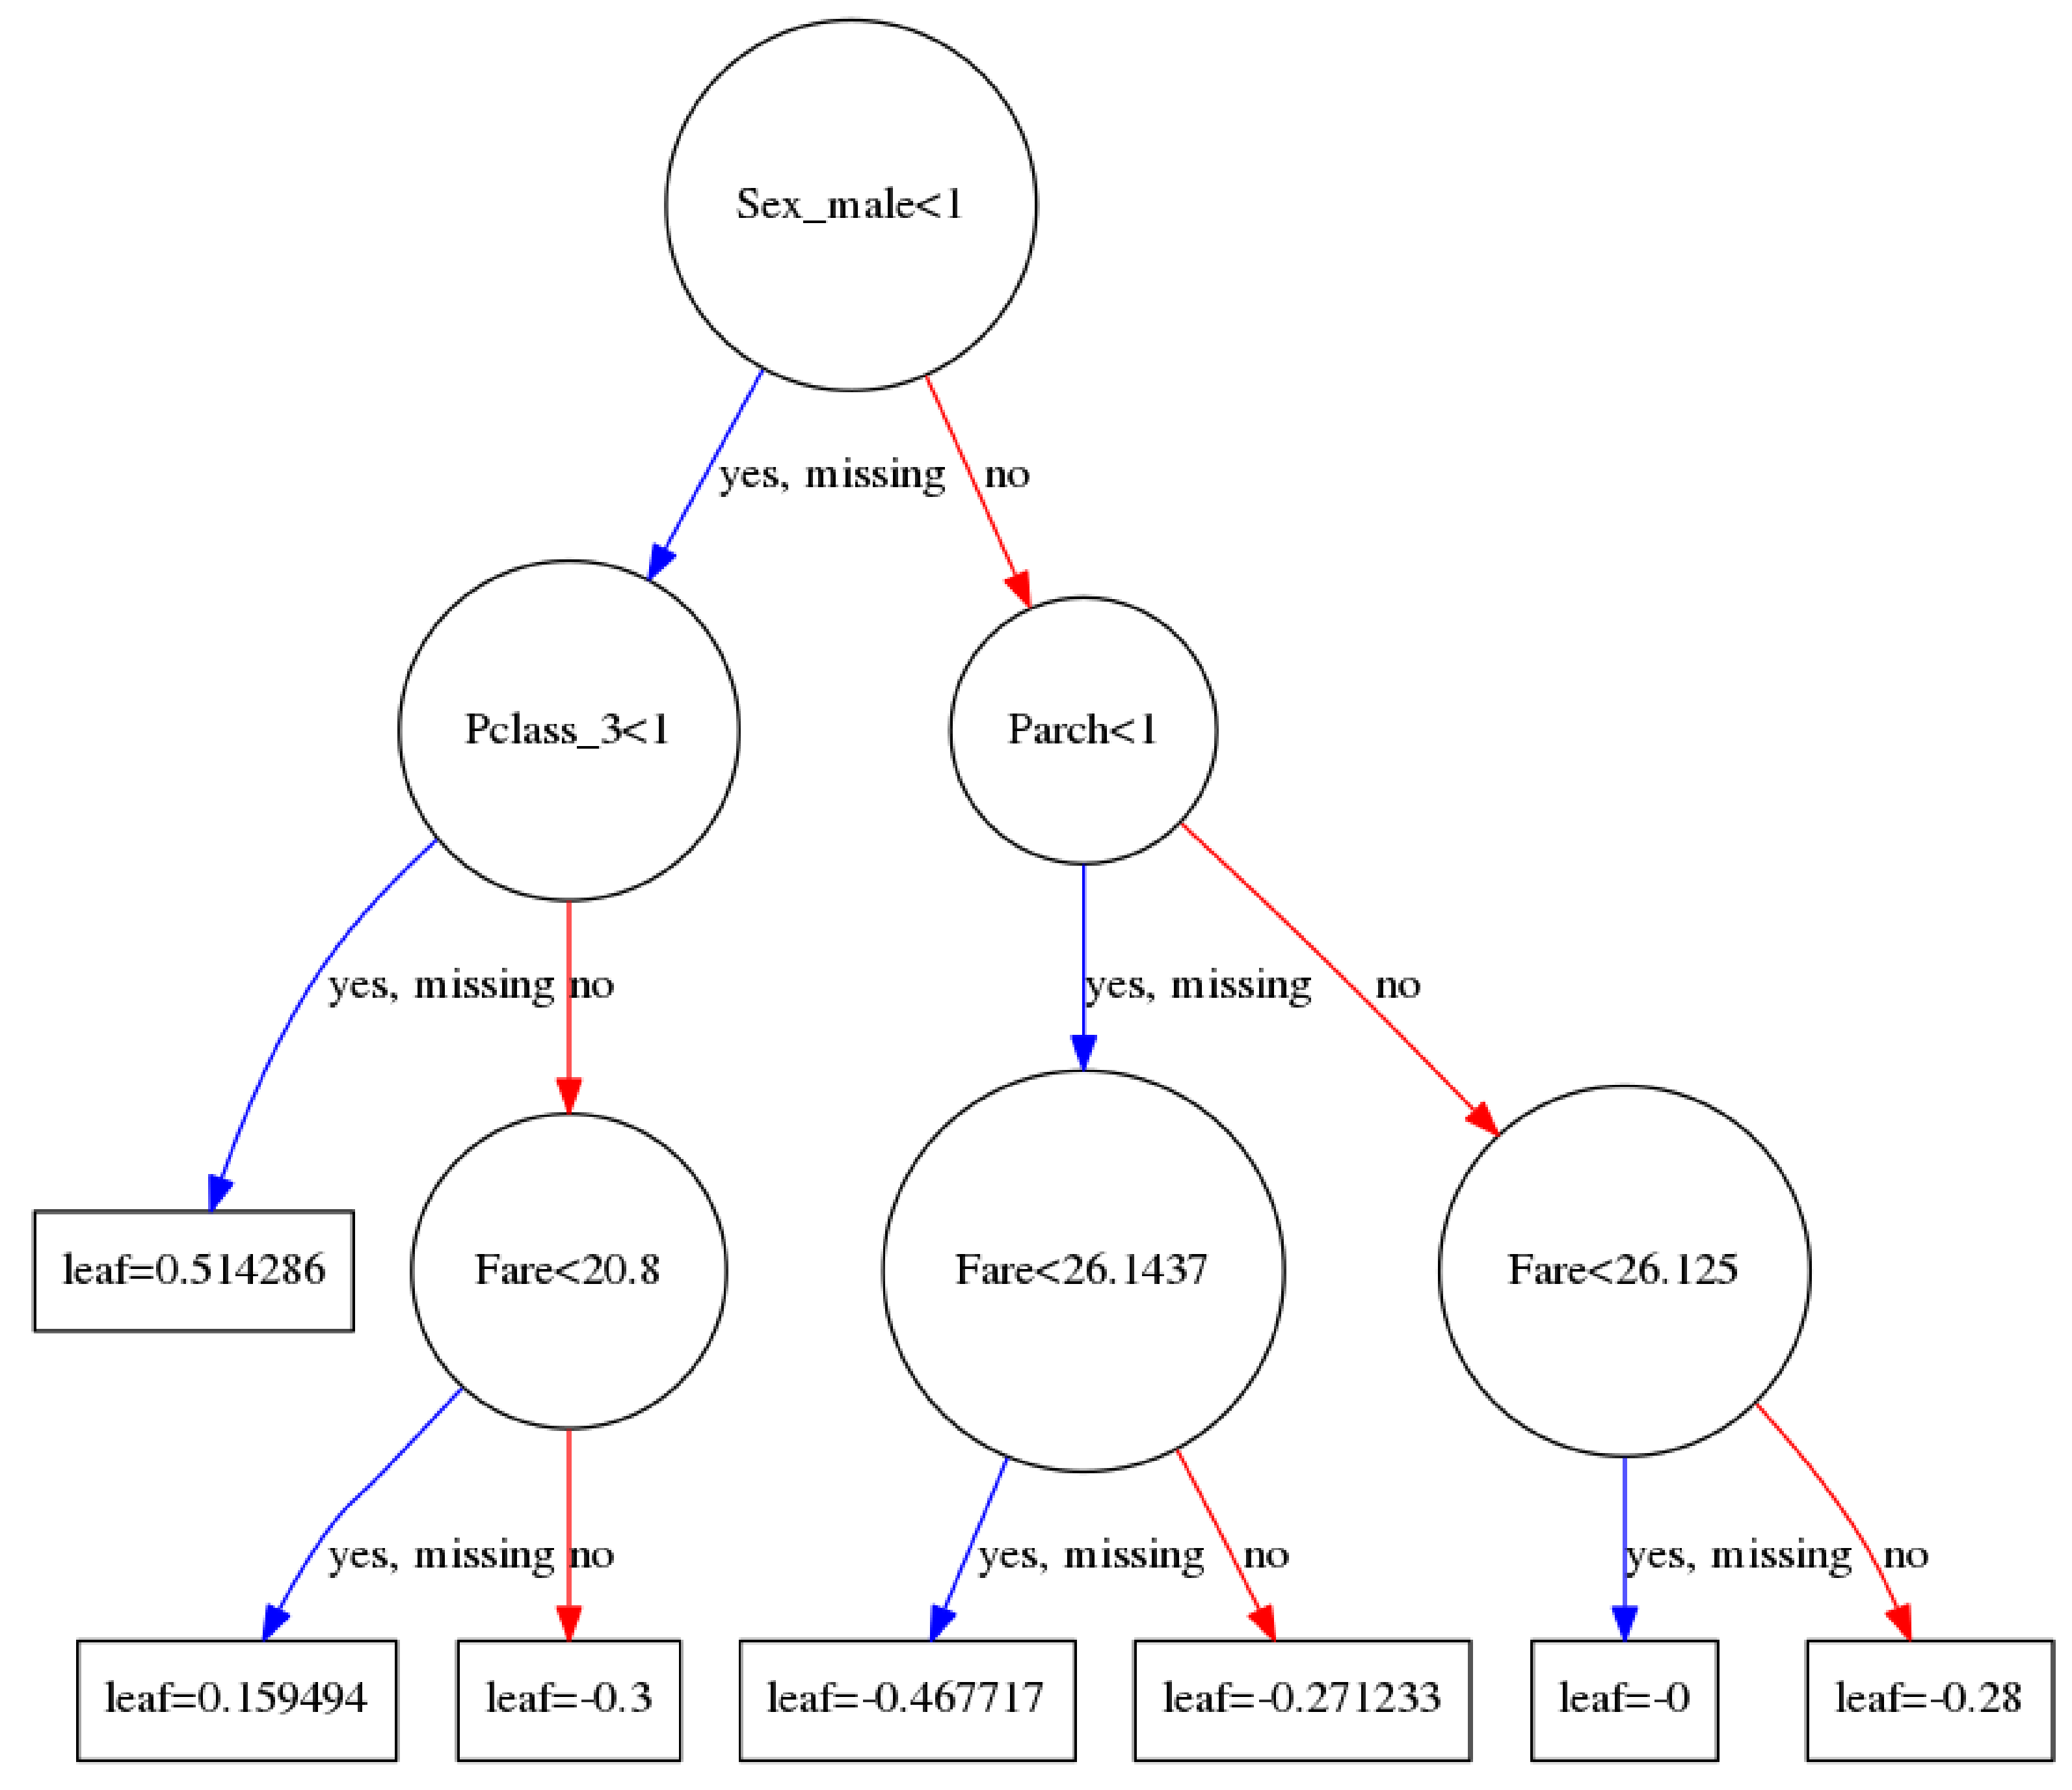

In [64]:
#Visualize our decision tree
from matplotlib.pylab import rcParams

##set up the parameters
rcParams['figure.figsize'] = 80,50
plot_tree(booster)
#fig = plt.pyplot.gcf()
#fig.set_size_inches(150, 100)
#fig.savefig('tree.png')

In [50]:
plt.show()

Seeing as AzureML studio gave significantly better results (78,5% instead of 76%) when allowing a random tune sweep of 50 samples I wanted to see if we could make more progress here.

In [56]:
parameters_test5 = { 
'max_depth':range(3,11,2),
'min_child_weight':range(1,6,2),
'gamma':[i/10.0 for i in range(0,5)],
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)],
'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}

grsearch5 = GridSearchCV(xgb.XGBClassifier(n_estimators=45,
                       max_depth = 3,
                       min_child_weight = 1,
                       learning_rate=0.3,
                       gamma = 0,
                       subsample = 0.9,
                       colsample_bytree = 0.8,
                       silent=False,
                       objective='binary:logistic',
                       booster='gbtree'),
                       param_grid = parameters_test5, scoring ='roc_auc', n_jobs =4, iid=False, cv=3, return_train_score = True)
grsearch5.fit(x_sktrain, y_sktrain)
pd.DataFrame(grsearch5.cv_results_)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_colsample_bytree,param_gamma,param_max_depth,param_min_child_weight,param_reg_alpha,param_subsample,...,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.050270,0.006266,0.857111,0.956967,0.6,0,3,1,1e-05,0.6,...,0.848039,0.961474,0.888363,0.946746,0.834929,0.962681,0.012532,0.002582,0.022738,0.007244
1,0.025637,0.002445,0.856591,0.961939,0.6,0,3,1,1e-05,0.7,...,0.854987,0.967466,0.881969,0.954871,0.832816,0.963480,0.005754,0.000305,0.020099,0.005256
2,0.028841,0.003006,0.861100,0.960195,0.6,0,3,1,1e-05,0.8,...,0.857204,0.961699,0.891901,0.955257,0.834196,0.963630,0.011450,0.000694,0.023719,0.003580
3,0.023937,0.002575,0.854625,0.963829,0.6,0,3,1,1e-05,0.9,...,0.846292,0.966362,0.889770,0.955836,0.827812,0.969288,0.004987,0.000265,0.025971,0.005777
4,0.026544,0.003404,0.858608,0.956755,0.6,0,3,1,0.01,0.6,...,0.846334,0.959877,0.893265,0.949040,0.836223,0.961349,0.002468,0.000295,0.024852,0.005489
5,0.021901,0.002623,0.859527,0.961048,0.6,0,3,1,0.01,0.7,...,0.859420,0.965258,0.887596,0.955385,0.831565,0.962500,0.004431,0.000593,0.022875,0.004159
6,0.023094,0.003235,0.862618,0.960508,0.6,0,3,1,0.01,0.8,...,0.852174,0.961378,0.898465,0.957358,0.837215,0.962788,0.004274,0.000619,0.026073,0.002300
7,0.028875,0.003100,0.854986,0.963968,0.6,0,3,1,0.01,0.9,...,0.846292,0.966298,0.885678,0.956457,0.832988,0.969150,0.009532,0.001435,0.022372,0.005437
8,0.032320,0.004815,0.855559,0.956892,0.6,0,3,1,0.1,0.6,...,0.846334,0.962514,0.889812,0.950819,0.830530,0.957342,0.001638,0.001499,0.025066,0.004785
9,0.028715,0.002995,0.858541,0.959501,0.6,0,3,1,0.1,0.7,...,0.847997,0.962632,0.890367,0.953638,0.837258,0.962234,0.000419,0.000553,0.022927,0.004149


In [57]:
grsearch5.best_params_, grsearch5.best_score_

({'colsample_bytree': 0.7,
  'gamma': 0.2,
  'max_depth': 3,
  'min_child_weight': 5,
  'reg_alpha': 1e-05,
  'subsample': 0.9},
 0.87736792784746742)

In [59]:
grsearch6.best_params_, grsearch6.best_score_

({'colsample_bytree': 0.7,
  'gamma': 0.4,
  'max_depth': 3,
  'min_child_weight': 5,
  'reg_alpha': 1e-05,
  'subsample': 0.9},
 0.87539242750240198)

In [60]:
param = {'colsample_bytree': 0.7,
  'gamma': 0.4,
  'max_depth': 3,
  'min_child_weight': 5,
  'reg_alpha': 1e-05,
  'subsample': 0.9,
  'silent':1, 
  'objective':'binary:logistic', 
  'seed':5 }

param['nthread'] = 4
param['eval_metric'] = 'auc'
num_round = 45
evallist = [(dval, 'eval'), (dtrain, 'train')]
#Train
booster = xgb.train(param, dtrain, num_round, evallist)

predictions = booster.predict(dtest)

for i in range(len(predictions)):
    if predictions[i] > 0.5:
        predictions[i] = 1
    else:
        predictions[i] = 0

inputdf = pd.read_csv("test.csv")
data_to_submit = pd.DataFrame({
    'PassengerId':inputdf.iloc[:,0],
    'Survived':predictions.astype(int)
})
data_to_submit.to_csv("xgboost_results.csv", index=False)

[0]	eval-auc:0.846633	train-auc:0.865181
[1]	eval-auc:0.824579	train-auc:0.87665
[2]	eval-auc:0.818266	train-auc:0.878305
[3]	eval-auc:0.828956	train-auc:0.889288
[4]	eval-auc:0.824032	train-auc:0.890819
[5]	eval-auc:0.824663	train-auc:0.891071
[6]	eval-auc:0.835522	train-auc:0.894889
[7]	eval-auc:0.829756	train-auc:0.895489
[8]	eval-auc:0.829672	train-auc:0.895555
[9]	eval-auc:0.831145	train-auc:0.901328
[10]	eval-auc:0.832239	train-auc:0.901394
[11]	eval-auc:0.832239	train-auc:0.904204
[12]	eval-auc:0.83186	train-auc:0.905493
[13]	eval-auc:0.831103	train-auc:0.906962
[14]	eval-auc:0.829545	train-auc:0.909981
[15]	eval-auc:0.833081	train-auc:0.912782
[16]	eval-auc:0.836953	train-auc:0.913519
[17]	eval-auc:0.838552	train-auc:0.916648
[18]	eval-auc:0.836911	train-auc:0.918283
[19]	eval-auc:0.835901	train-auc:0.917803
[20]	eval-auc:0.831229	train-auc:0.919539
[21]	eval-auc:0.836027	train-auc:0.919348
[22]	eval-auc:0.832618	train-auc:0.920342
[23]	eval-auc:0.833333	train-auc:0.921754
[24]

The model dit not improve in kaggle, results were the same. (76%)